## Proyecto

In [54]:
#Importamos las librerísas necesarias para llevar a cabo el proyecto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#Cargamos los datos para este proyecto
datos = np.load('proyecto_data/proyecto_training_data.npy')
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
#Se dividen los datos de la siguiente manera:
# 80% de las filas serán datos de entrenamiento y 20% de las filas serán para pruebas

#Datos de entrenamiento
d_entrenamiento = int(0.8 * len(datos))
ds_entrenamiento = datos[:d_entrenamiento]
#datos de validacion
ds_validacion = datos[d_entrenamiento:]

print('Longitud del data set de entrenamiento: ',len(ds_entrenamiento))
print('Longitud del data set de entrenamiento: ',len(ds_validacion))

Longitud del data set de entrenamiento:  1168
Longitud del data set de entrenamiento:  292


In [4]:
#Convertimos el set de datos que vamos a utlizar a dataframe para que sea más fácil identificar cada característica y hacer conversiones
#Agregar nombres a las columnas de acuerdo a la información proporcionada
df_entrenamiento = pd.DataFrame(data = datos, columns = ["PrecioVenta", "CalidadMaterial","PCPerPiso", "THabitaciones", "AConstruccion", "PLFrente"])

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_entrenamiento = df_entrenamiento.astype({"CalidadMaterial" : int, "THabitaciones" : int, "AConstruccion" : int})

df_entrenamiento

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1455,175000.0,6,953.0,7,1999,62.0
1456,210000.0,6,2073.0,7,1978,85.0
1457,266500.0,7,1188.0,9,1941,66.0
1458,142125.0,5,1078.0,5,1950,68.0


In [51]:
# Verificamos la información de cada columna
#Podemos observar que el la característica de PLFrente hay datos nulos
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
PrecioVenta        1460 non-null float64
CalidadMaterial    1460 non-null int32
PCPerPiso          1460 non-null float64
THabitaciones      1460 non-null int32
AConstruccion      1460 non-null int32
PLFrente           1201 non-null float64
dtypes: float64(3), int32(3)
memory usage: 51.5 KB


## Inicia Análisis Exploratorio

In [5]:
media  = np.reshape(np.array(df_entrenamiento.mean(axis=0)),(6,1))
v_max =  np.reshape(np.array(df_entrenamiento.max(axis=0)),(6,1))
v_min = np.reshape(np.array(df_entrenamiento.min(axis=0)),(6,1))
rango = np.reshape(np.array(v_max-v_min),(6,1))
d_estandar = np.reshape(np.array(df_entrenamiento.std(axis=0)),(6,1))

d_exploratorios = np.concatenate((media,v_max,v_min,rango,d_estandar), axis=1)

columnas = df_entrenamiento.columns
df_exploratorios = pd.DataFrame(data = d_exploratorios, columns = ["Media", "VMax","Vmin", "Rango", "DEstandar"], index=columnas)

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_exploratorios = df_exploratorios.astype({"VMax" : int, "Vmin" : int, "Rango" : int})

df_exploratorios

,Media,VMax,Vmin,Rango,DEstandar
PrecioVenta,180921.195890,755000,34900,720100,79442.502883
CalidadMaterial,6.099315,10,1,9,1.382997
PCPerPiso,1162.626712,4692,334,4358,386.587738
THabitaciones,6.517808,14,2,12,1.625393
AConstruccion,1971.267808,2010,1872,138,30.202904
PLFrente,70.049958,313,21,292,24.284752


In [48]:
df_entrenamiento.describe()

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Inician histogramas

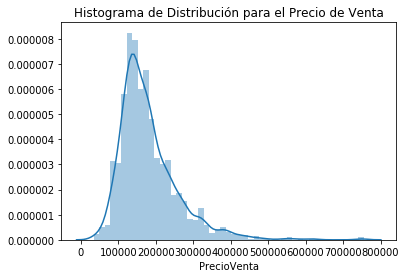

In [6]:
#Histograma para el Precio de Venta
sns.distplot(df_entrenamiento["PrecioVenta"]).set_title("Histograma de Distribución para el Precio de Venta")
plt.show()

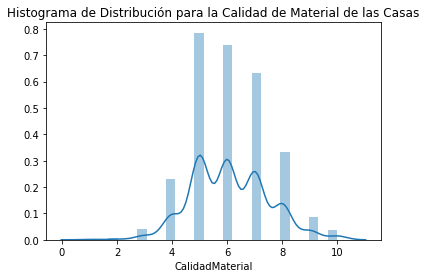

In [7]:
#Histograma para la Calidad de Material
sns.distplot(df_entrenamiento["CalidadMaterial"]).set_title("Histograma de Distribución para la Calidad de Material de las Casas")
plt.show()

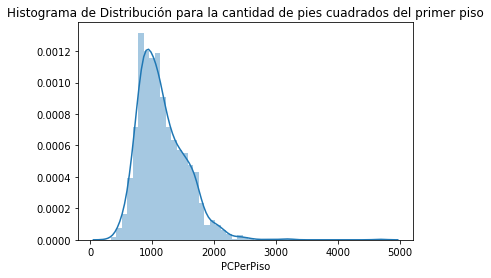

In [8]:
#Histograma para la característica de Pies cuadrados del primer piso de la casa
sns.distplot(df_entrenamiento["PCPerPiso"]).set_title("Histograma de Distribución para la cantidad de pies cuadrados del primer piso")
plt.show()

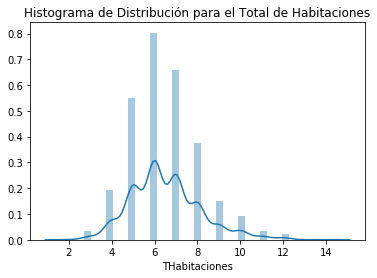

In [9]:
#Histograma para el Total de Habitaciones, sin incluir baños
sns.distplot(df_entrenamiento["THabitaciones"]).set_title("Histograma de Distribución para el Total de Habitaciones")
plt.show()

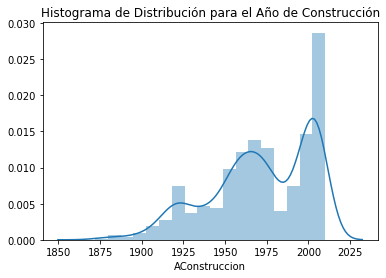

In [10]:
#Histograma para la característica de año de construcción de cada casa
sns.distplot(df_entrenamiento["AConstruccion"]).set_title("Histograma de Distribución para el Año de Construcción")
plt.show()

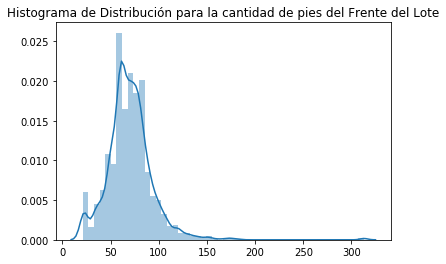

In [12]:
#Histograma para la cantidad de pies del frente del Lote a la calle

#datos_sn = np.array(df_entrenamiento["PLFrente"])
#datos_sn = datos_sn[~np.isnan(datos_sn)]
#Quitamos los datos nulos de esta característica para poder hacer el gráfico
datos_sn = df_entrenamiento['PLFrente'].dropna()

sns.distplot(datos_sn).set_title("Histograma de Distribución para la cantidad de pies del Frente del Lote")
plt.show()

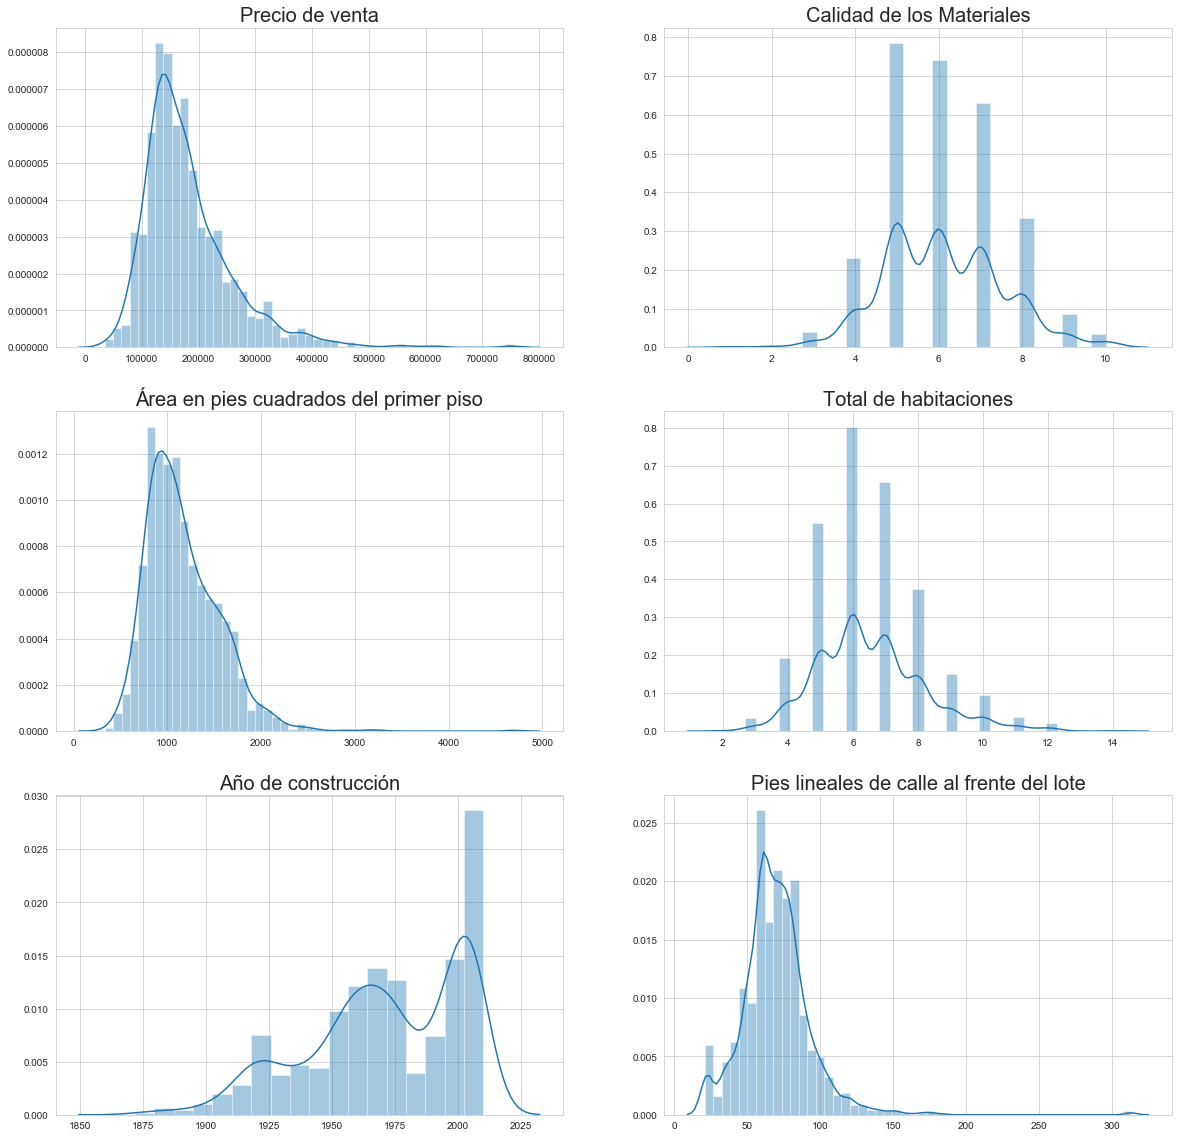

In [60]:
f, ax = plt.subplots(figsize=(20,20))
sns.set_style("whitegrid")

plt.subplot(3, 2, 1)
graficas = sns.distplot(df_entrenamiento['PrecioVenta'], axlabel=False)
plt.title("Precio de venta", fontdict={'fontsize' : 20})

plt.subplot(3, 2, 2)
graficas = sns.distplot(df_entrenamiento['CalidadMaterial'], axlabel=False)
plt.title("Calidad de los Materiales", fontdict={'fontsize' : 20})

plt.subplot(3,2,3)
graficas = sns.distplot(df_entrenamiento['PCPerPiso'], axlabel=False)
plt.title("Área en pies cuadrados del primer piso", fontdict={'fontsize' : 20})

plt.subplot(3,2,4)
graficas = sns.distplot(df_entrenamiento['THabitaciones'], axlabel=False)
plt.title("Total de habitaciones", fontdict={'fontsize' : 20})

plt.subplot(3,2,5)
graficas = sns.distplot(df_entrenamiento['AConstruccion'], axlabel=False)
plt.title("Año de construcción", fontdict={'fontsize' : 20})

plt.subplot(3,2,6)
graficas = sns.distplot(datos_sn, axlabel=False)
plt.title("Pies lineales de calle al frente del lote", fontdict={'fontsize' : 20})


plt.show(graficas)

## Calculo de Coeficiente de Correlacion

In [63]:
#Calculamos el coeficiente de correlación
df_correlacion = df_entrenamiento.corr()
df_correlacion

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
PrecioVenta,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
CalidadMaterial,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
PCPerPiso,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
THabitaciones,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
AConstruccion,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
PLFrente,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


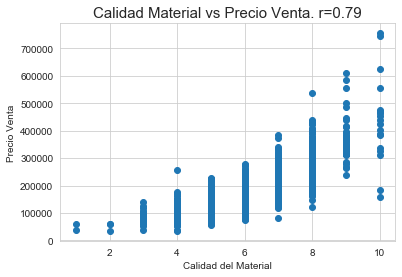

In [84]:
#Gráfico de dispersión de Calidad de los Materiales vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["CalidadMaterial"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Calidad del Material")
ax.set_ylabel("Precio Venta")
ax.set_title("Calidad Material vs Precio Venta. r=" + str(round(df_correlacion.iloc[1,0],2)),fontdict={'fontsize':15})
plt.show()

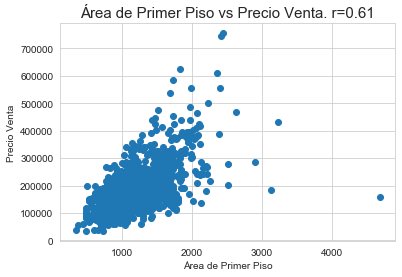

In [85]:
#Gráfico de dispersión de área en pies cuadrados del primer pis vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["PCPerPiso"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Área de Primer Piso")
ax.set_ylabel("Precio Venta")
ax.set_title("Área de Primer Piso vs Precio Venta. r=" + str(round(df_correlacion.iloc[2,0],2)),fontdict={'fontsize':15})
plt.show()

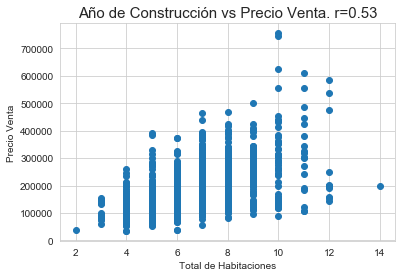

In [88]:
#Gráfico de dispersión del Total de Habitaciones vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["THabitaciones"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Total de Habitaciones")
ax.set_ylabel("Precio Venta")
ax.set_title("Año de Construcción vs Precio Venta. r=" + str(round(df_correlacion.iloc[3,0],2)),fontdict={'fontsize':15})
plt.show()

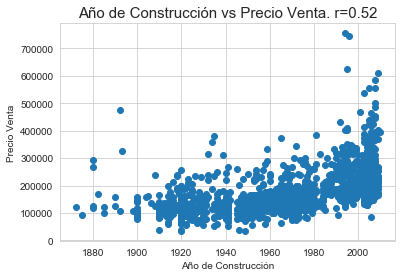

In [89]:
#Gráfico de dispersión de Año de construcción vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["AConstruccion"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Año de Construcción")
ax.set_ylabel("Precio Venta")
ax.set_title("Año de Construcción vs Precio Venta. r=" + str(round(df_correlacion.iloc[4,0],2)),fontdict={'fontsize':15})
plt.show()

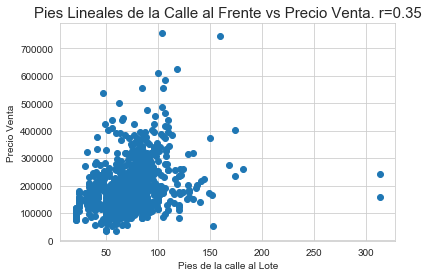

In [92]:
#Gráfico de dispersión de Pies de la calle al Lote vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["PLFrente"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Pies de la calle al Lote")
ax.set_ylabel("Precio Venta")
ax.set_title("Pies Lineales de la Calle al Frente vs Precio Venta. r=" + str(round(df_correlacion.iloc[5,0],2)),fontdict={'fontsize':15})
plt.show()